In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ilaks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ilaks\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Gensim
import gensim
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
# Spacy for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load('en_core_web_sm')


import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from collections import defaultdict
# Code Snippet for Named Entity Barchart
from collections import  Counter
import operator



In [6]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [7]:
jsonData = pd.read_csv('filtered_data.csv', sep="|")

In [8]:
jsonData

,Unnamed: 0,category,headline,authors,link,short_description,date,Text,Section,Cleaned Text,Word Tokens,Filtered Tokens
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,CRIME,there be 2 mass shootings in texas last week b...,"['there', 'be', '2', 'mass', 'shootings', 'in'...","['mass', 'shootings', 'texas', 'last', 'week',..."
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,"['will', 'smith', 'joins', 'diplo', 'and', 'ni...","['smith', 'joins', 'diplo', 'nicky', 'jam', 'w..."
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT,hugh grant marrie for the first time at age 57...,"['hugh', 'grant', 'marrie', 'for', 'the', 'fir...","['hugh', 'grant', 'marrie', 'first', 'time', '..."
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...,"['jim', 'carrey', 'blasts', 'castrato', 'adam'...","['jim', 'carrey', 'blasts', 'castrato', 'adam'..."
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,julianna margulies use donald trump poop bag t...,"['julianna', 'margulies', 'use', 'donald', 'tr...","['julianna', 'margulies', 'use', 'donald', 'tr..."
...,...,...,...,...,...,...,...,...,...,...,...,...
200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECHNOLOGY,rim ceo thorsten hein significant plan for bla...,"['rim', 'ceo', 'thorsten', 'hein', 'significan...","['rim', 'ceo', 'thorsten', 'hein', 'significan..."
200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,maria sharapova stun by victoria azarenka in a...,"['maria', 'sharapova', 'stun', 'by', 'victoria...","['maria', 'sharapova', 'stun', 'victoria', 'az..."
200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,giant over patriots jet over colt among most...,"['giant', 'over', 'patriots', 'jet', 'over', '...","['giant', 'patriots', 'jet', 'colt', 'among', ..."
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,aldon smith arrested 49er linebacker bust for ...,"['aldon', 'smith', 'arrested', '49er', 'lineba...","['aldon', 'smith', 'arrested', '49er', 'lineba..."


In [9]:
jsonData['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [10]:
jsonData['headline'][8]

"Mike Myers Reveals He'd 'Like To' Do A Fourth Austin Powers Film"

In [11]:
jsonData['short_description'][3960]

'The liquidation could put up to 33,000 U.S. jobs at risk.'

In [12]:
jsonData['Text']= jsonData["headline"].astype(str) +" " + jsonData["short_description"].astype(str)

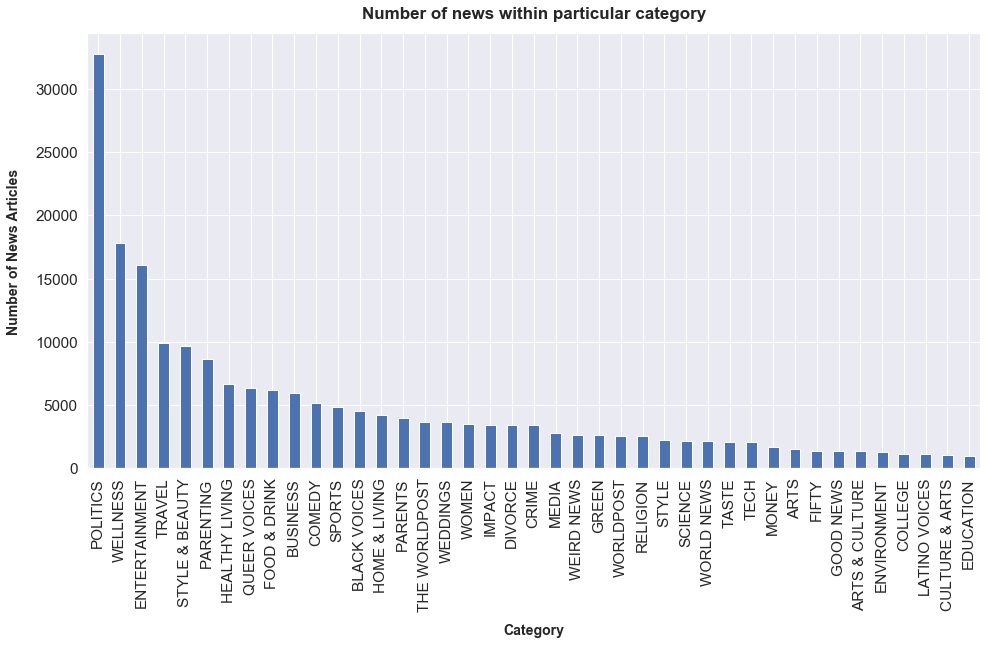

In [13]:
sns.set(font_scale=1.4)
jsonData['category'].value_counts().plot(kind="bar", figsize=(16, 8))
plt.xlabel("Category", labelpad=12, fontsize=14, fontweight="bold")
plt.ylabel("Number of News Articles", labelpad=14, fontsize=14, fontweight="bold")
plt.title("Number of news within particular category", fontsize=17, fontweight="bold", y=1.02);

## Sentiment Analysis using VADAR
Vadar is short for Valence Aware dictionary and sEntiment reasoner. Vadar identified as lexicon and rule based sentiment analysis tool used to analyze the sentiment of a text. Lexicon is a list of lexical feaures (words) which are labeled with positive or negtive based on semantic meaning.The focus on this notebook not determine if a sentence is objective or subjective, fact or opinion but only focusing on wether the text express positive or negative.The result shows most of the news headline giving is neutral and positive is giving higher results than negative. The next stage will drop the neutral in order to understand the negative and positive news headline, which more helps us to understand more about the topic given.

In [14]:
vader_analyzer = SentimentIntensityAnalyzer()
def getPolarity(text):
    stats=vader_analyzer.polarity_scores(text)
    if stats['compound'] >= 0.05 : 
        return 'positive'
  
    elif stats['compound'] <= - 0.05 : 
        return 'negative'
        
    else : 
        return 'neutral'  

In [15]:
jsonData['Sentiment']=jsonData['Text'].apply(getPolarity)

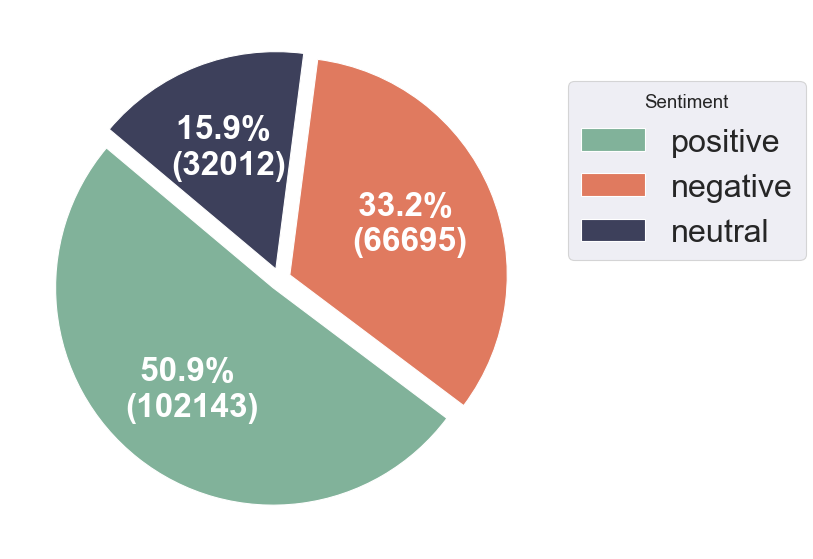

In [16]:
y = jsonData['Sentiment'].value_counts()
mylabels = y.index

fig, ax = plt.subplots(figsize=(24, 9), subplot_kw=dict(aspect="equal"), dpi= 80)
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% \n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(y, 
                                  autopct=lambda pct: func(pct, y),
                                  textprops=dict(color="w"), 
                                  colors=['#81b29a', '#e07a5f', '#3d405b'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, mylabels, title="Sentiment", loc="center left",fontsize= 'xx-large' ,bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=30, weight=700)
#ax.set_title("Number of News by Sentiment", fontsize=18, fontweight="bold")
plt.show()

## Topic Modeling

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
def get_tokens(text):
    tokens = nltk.word_tokenize(text)
    return tokens
def get_filtered_tokens(tokens):
    tokens_filtered = [t for t in tokens if t not in stopwords and t.isdigit() == False]
    return tokens_filtered

In [18]:
jsonData['Word Tokens'] =jsonData['Cleaned Text'].apply(get_tokens)

In [19]:
jsonData['Filtered Tokens'] = jsonData['Word Tokens'].apply(get_filtered_tokens)

In [20]:
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = jsonData['Cleaned Text'].values.tolist()
data_words = list(sent_to_words(data))

In [21]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [22]:
len(bigram_mod.phrasegrams)

6115

In [23]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [24]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['mass_shooting', 'texas', 'last', 'week', 'tv', 'leave', 'husband', 'kill', 'child', 'day', 'america']]


In [25]:
print(data_lemmatized[:2])

[['mass_shooting', 'texas', 'last', 'week', 'tv', 'leave', 'husband', 'kill', 'child', 'day', 'america'], ['smith', 'join', 'diplo', 'nicky', 'jam', 'world', 'cup', 'official', 'song', 'course', 'song']]


In [26]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]]


## 8 topic

In [33]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=8, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=15,
                                       per_word_topics=True,
                                      minimum_phi_value = 0.01)

In [34]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"world" + 0.009*"day" + 0.007*"water" + 0.006*"sometimes" + '
  '0.006*"marriage" + 0.005*"city" + 0.005*"today" + 0.005*"community" + '
  '0.005*"school" + 0.005*"college"'),
 (1,
  '0.028*"woman" + 0.010*"say" + 0.008*"man" + 0.007*"vote" + 0.006*"black" + '
  '0.006*"poll" + 0.006*"right" + 0.005*"win" + 0.005*"success" + '
  '0.005*"race"'),
 (2,
  '0.016*"make" + 0.015*"life" + 0.014*"time" + 0.014*"get" + 0.014*"day" + '
  '0.013*"good" + 0.012*"way" + 0.012*"go" + 0.012*"know" + 0.012*"thing"'),
 (3,
  '0.038*"photo" + 0.017*"video" + 0.015*"new" + 0.013*"look" + '
  '0.010*"wedding" + 0.009*"get" + 0.008*"divorce" + 0.008*"week" + '
  '0.008*"show" + 0.007*"see"'),
 (4,
  '0.019*"child" + 0.012*"kid" + 0.012*"parent" + 0.010*"fashion" + '
  '0.009*"year" + 0.008*"love" + 0.007*"learn" + 0.006*"body" + '
  '0.006*"relationship" + 0.006*"week"'),
 (5,
  '0.034*"trump" + 0.015*"say" + 0.013*"donald" + 0.012*"president" + '
  '0.008*"tip" + 0.007*"obama" + 0.006*"spri

In [83]:
def saveTopicwords(lda=lda_model , nb_topics=8, nb_words=10,fileName='topicWords.csv'):
    topicName=[str("Topic_"+str(topic_id)) for topic_id  in range(nb_topics)]
    wordWeight=[lda.show_topic(topic_id, topn=nb_words)for topic_id  in range(nb_topics)]
    df=pd.DataFrame()
    df['topicName']=topicName
    df['wordWeight']=wordWeight
    print(df)
    df.to_csv(fileName, sep = '|')

In [84]:
saveTopicwords(lda=lda_model , nb_topics=8, nb_words=10,fileName='topicWords.csv')

  topicName                                         wordWeight
0   Topic_0  [(world, 0.0119472705), (day, 0.009428343), (w...
1   Topic_1  [(woman, 0.027715547), (say, 0.009554953), (ma...
2   Topic_2  [(make, 0.01593464), (life, 0.014951728), (tim...
3   Topic_3  [(photo, 0.038485475), (video, 0.016862487), (...
4   Topic_4  [(child, 0.01924097), (kid, 0.012117266), (par...
5   Topic_5  [(trump, 0.03363341), (say, 0.015397158), (don...
6   Topic_6  [(say, 0.017432762), (kill, 0.007803844), (man...
7   Topic_7  [(new, 0.013379486), (study, 0.0109028425), (h...


In [85]:
lda=lda_model 
nb_topics=8
nb_words=10
fileName='topicWords.csv'

topicName=[str("Topic_"+str(topic_id)) for topic_id  in range(nb_topics)]
wordWeight=[lda.show_topic(topic_id, topn=nb_words)for topic_id  in range(nb_topics)]
df=pd.DataFrame()
df['topicName']=topicName
df['wordWeight']=wordWeight
df
#df.to_csv(fileName, sep = '|')

,topicName,wordWeight
0,Topic_0,"[(world, 0.0119472705), (day, 0.009428343), (w..."
1,Topic_1,"[(woman, 0.027715547), (say, 0.009554953), (ma..."
2,Topic_2,"[(make, 0.01593464), (life, 0.014951728), (tim..."
3,Topic_3,"[(photo, 0.038485475), (video, 0.016862487), (..."
4,Topic_4,"[(child, 0.01924097), (kid, 0.012117266), (par..."
5,Topic_5,"[(trump, 0.03363341), (say, 0.015397158), (don..."
6,Topic_6,"[(say, 0.017432762), (kill, 0.007803844), (man..."
7,Topic_7,"[(new, 0.013379486), (study, 0.0109028425), (h..."


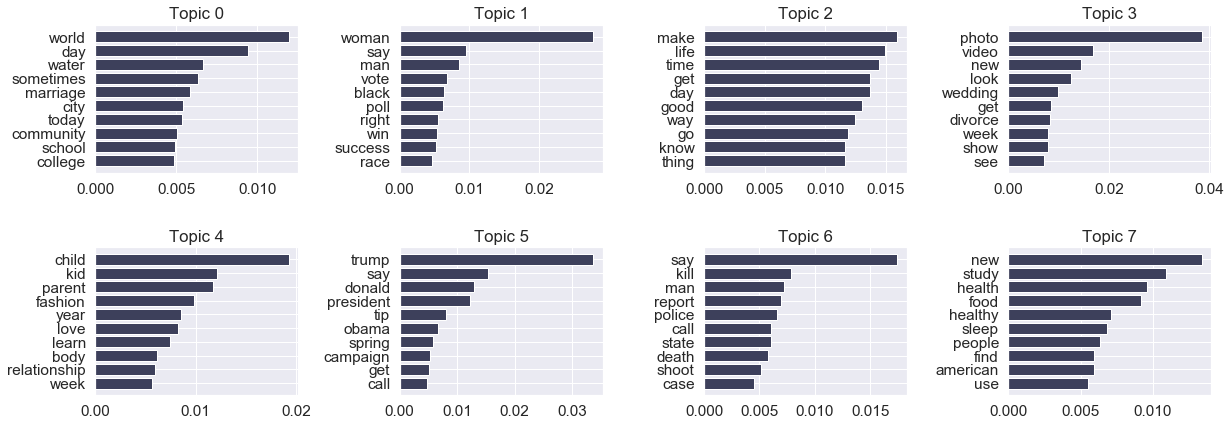

In [35]:
import matplotlib.pyplot as plt
import math
from matplotlib import gridspec
k =8
def plot_top_words(lda=lda_model , nb_topics=8, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=0.5, hspace=0.5)
    plt.figure(figsize=(20,15))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='#3d405b', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))
        
plot_top_words()

In [36]:
lda_model.save("ldamodel.model")

In [37]:
from gensim import corpora, models, similarities
lda_model =  models.LdaModel.load("ldamodel.model")

In [38]:
doc_topics=[lda_model.get_document_topics(doc) for doc in corpus]

In [39]:
jsonData['Topic_score']=doc_topics

In [41]:
doc_topics

[[(0, 0.01045009),
  (1, 0.010439094),
  (2, 0.36881557),
  (3, 0.1353457),
  (4, 0.15126552),
  (5, 0.010447956),
  (6, 0.30279776),
  (7, 0.010438343)],
 [(0, 0.5526419),
  (1, 0.010445488),
  (2, 0.010442339),
  (3, 0.26439258),
  (4, 0.010443056),
  (5, 0.010444413),
  (6, 0.1307496),
  (7, 0.010440595)],
 [(1, 0.010001964),
  (2, 0.010016037),
  (3, 0.2405706),
  (4, 0.010030754),
  (5, 0.010000895),
  (6, 0.010003502),
  (7, 0.69937825)],
 [(1, 0.51294935), (3, 0.083469726), (5, 0.36344844)],
 [(2, 0.28567955), (3, 0.098981276), (5, 0.19274244), (7, 0.39454514)],
 [(0, 0.07630172), (1, 0.21843433), (3, 0.31592676), (6, 0.35982552)],
 [(0, 0.010428198),
  (1, 0.010434665),
  (2, 0.010452688),
  (3, 0.1340026),
  (4, 0.010430915),
  (5, 0.80338556),
  (6, 0.010430255),
  (7, 0.010435079)],
 [(0, 0.015690355),
  (1, 0.015686115),
  (2, 0.2079586),
  (3, 0.6978977),
  (4, 0.015698362),
  (5, 0.015691059),
  (6, 0.015689371),
  (7, 0.015688455)],
 [(0, 0.07330243), (3, 0.445078), (4, 

In [65]:
from operator import itemgetter

topicColumns=["Topic_0","Topic_1","Topic_2","Topic_3","Topic_4","Topic_5","Topic_6","Topic_7","mostDominantTopic"]


topicData=[]
for row in doc_topics:
    dictRow  ={col:""  for col in topicColumns}
    mostDominantTopic=max(row,key=itemgetter(1))[0]
    dictRow['mostDominantTopic']="Topic_"+str(mostDominantTopic)
    #print(len(row))
    for val in row:
        strintText="Topic_"+str(val[0])
        dictRow[strintText]=val[1]*100
    
    topicData.append(dictRow) 

    
topics=pd.DataFrame(topicData)

In [66]:
topics

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,mostDominantTopic
0,1.04501,1.04391,36.8816,13.5346,15.1266,1.0448,30.2798,1.04383,Topic_2
1,55.2642,1.04455,1.04423,26.4393,1.04431,1.04444,13.075,1.04406,Topic_0
2,,1.0002,1.0016,24.0571,1.00308,1.00009,1.00035,69.9378,Topic_7
3,,51.2949,,8.34697,,36.3448,,,Topic_1
4,,,28.568,9.89813,,19.2742,,39.4545,Topic_7
...,...,...,...,...,...,...,...,...,...
200848,,,6.79505,6.4256,26.8598,8.7132,,49.2456,Topic_7
200849,,10.1083,9.13186,44.8401,,7.17431,26.4233,,Topic_3
200850,48.2775,,,37.5964,,,10.4405,,Topic_0
200851,,,,22.1531,,10.2763,42.668,21.7678,Topic_6


In [67]:
jsonData=jsonData.join(topics)

In [68]:
jsonData

,Unnamed: 0,category,headline,authors,link,short_description,date,Text,Section,Cleaned Text,...,Topic_score,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,mostDominantTopic
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,CRIME,there be 2 mass shootings in texas last week b...,...,"[(0, 0.01045009), (1, 0.010439094), (2, 0.3688...",1.04501,1.04391,36.8816,13.5346,15.1266,1.0448,30.2798,1.04383,Topic_2
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,...,"[(0, 0.5526419), (1, 0.010445488), (2, 0.01044...",55.2642,1.04455,1.04423,26.4393,1.04431,1.04444,13.075,1.04406,Topic_0
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT,hugh grant marrie for the first time at age 57...,...,"[(1, 0.010001964), (2, 0.010016037), (3, 0.240...",,1.0002,1.0016,24.0571,1.00308,1.00009,1.00035,69.9378,Topic_7
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,jim carrey blasts castrato adam schiff and dem...,...,"[(1, 0.51294935), (3, 0.083469726), (5, 0.3634...",,51.2949,,8.34697,,36.3448,,,Topic_1
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,julianna margulies use donald trump poop bag t...,...,"[(2, 0.28567955), (3, 0.098981276), (5, 0.1927...",,,28.568,9.89813,,19.2742,,39.4545,Topic_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECHNOLOGY,rim ceo thorsten hein significant plan for bla...,...,"[(2, 0.06795054), (3, 0.06425604), (4, 0.26859...",,,6.79505,6.4256,26.8598,8.7132,,49.2456,Topic_7
200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,maria sharapova stun by victoria azarenka in a...,...,"[(1, 0.101082504), (2, 0.09131857), (3, 0.4484...",,10.1083,9.13186,44.8401,,7.17431,26.4233,,Topic_3
200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,giant over patriots jet over colt among most...,...,"[(0, 0.48277506), (3, 0.37596375), (6, 0.10440...",48.2775,,,37.5964,,,10.4405,,Topic_0
200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,aldon smith arrested 49er linebacker bust for ...,...,"[(3, 0.22153124), (5, 0.10276255), (6, 0.42668...",,,,22.1531,,10.2763,42.668,21.7678,Topic_6


In [69]:
jsonData.to_csv('dataTopics.csv', sep = '|')

In [70]:
datatopic=pd.read_csv('dataTopics.csv', sep="|")
datatopic

,Unnamed: 0,Unnamed: 0.1,category,headline,authors,link,short_description,date,Text,Section,...,Topic_score,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,mostDominantTopic
0,0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,CRIME,...,"[(0, 0.01045009), (1, 0.010439094), (2, 0.3688...",1.045009,1.043909,36.881557,13.534570,15.126552,1.044796,30.279776,1.043834,Topic_2
1,1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,...,"[(0, 0.5526419), (1, 0.010445488), (2, 0.01044...",55.264193,1.044549,1.044234,26.439258,1.044306,1.044441,13.074960,1.044060,Topic_0
2,2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT,...,"[(1, 0.010001964), (2, 0.010016037), (3, 0.240...",NaN,1.000196,1.001604,24.057060,1.003075,1.000089,1.000350,69.937825,Topic_7
3,3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,...,"[(1, 0.51294935), (3, 0.083469726), (5, 0.3634...",NaN,51.294935,NaN,8.346973,NaN,36.344844,NaN,NaN,Topic_1
4,4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,...,"[(2, 0.28567955), (3, 0.098981276), (5, 0.1927...",NaN,NaN,28.567955,9.898128,NaN,19.274244,NaN,39.454514,Topic_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200848,200848,200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,SCIENCE & TECHNOLOGY,...,"[(2, 0.06795054), (3, 0.06425604), (4, 0.26859...",NaN,NaN,6.795054,6.425604,26.859805,8.713198,NaN,49.245623,Topic_7
200849,200849,200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,NaN,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,...,"[(1, 0.101082504), (2, 0.09131857), (3, 0.4484...",NaN,10.108250,9.131857,44.840056,NaN,7.174309,26.423320,NaN,Topic_3
200850,200850,200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",NaN,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,...,"[(0, 0.48277506), (3, 0.37596375), (6, 0.10440...",48.277506,NaN,NaN,37.596375,NaN,NaN,10.440499,NaN,Topic_0
200851,200851,200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,NaN,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,...,"[(3, 0.22153124), (5, 0.10276255), (6, 0.42668...",NaN,NaN,NaN,22.153124,NaN,10.276255,42.668027,21.767801,Topic_6
